## TCR Project

# Assignment :
The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing
campaigns were based on phone calls. Often, more than one contact to the same client was required, in
order to assess if the product (bank term deposit) would be ('yes') or not ('no') subscribed (Col -21).
Attribute Information:
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical:
'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','t
echnician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means
divorced or widowed)
4 - education (categorical:
'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the
output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed.
Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark
purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes
last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign
(numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
TCR INNOVATION 
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)
21- Has the client subscribed to a term deposit? (binary: 'yes','no') – Target Variable


### 1)Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
%matplotlib inline

### 2)Read the data as a data frame using pandas

In [2]:
bank=pd.read_csv("bank-full.csv")
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### 3) Shape of the data

In [3]:
bank.shape

(45211, 17)

### 4)Data type of each attribute

In [4]:
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [5]:
bank.rename(columns={'y':'Target'},inplace=True)
bank.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no


### 5)Checking the presence of missing values

In [6]:
bank.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
Target       False
dtype: bool

### 6)5 point summary of numerical attributes

In [7]:
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


### 7)checking for class imbalance

In [8]:
no,yes=bank.Target.value_counts()
bank.Target.value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

**Given data set is highly imbalanced, i.e. number of data belonging to 'no' category is way higher than 'yes' category.**

In [9]:
bank['Target'].value_counts(normalize=True)

no     0.883015
yes    0.116985
Name: Target, dtype: float64

##### The response rate is only 11.6%. Hence the Y(Target) variable has a high class imbalance. Hence accuracy will not be a reliable model performance measure. 

##### FN is very critical for this business case because a false negative is a customer who will potentially subscribe for a loan but who has been classified as 'will not subscribe'. Hence the most relevant model performance measure is recall

### 8)Checking the presence of outliers

##### For Age

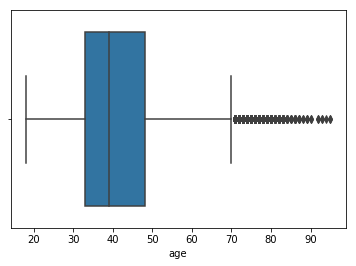

In [10]:
sns.boxplot(bank.age)

**Age column has some outliers. The median age is about 39 years. There are some customers above 90 years of age. This data might have to be checked to remove outliers**

In [11]:
# Quartiles
print('1º Quartile: ', bank['age'].quantile(q = 0.25))
print('2º Quartile: ', bank['age'].quantile(q = 0.50))
print('3º Quartile: ', bank['age'].quantile(q = 0.75))
print('4º Quartile: ', bank['age'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Ages above: ', bank['age'].quantile(q = 0.75) + 
                      1.5*(bank['age'].quantile(q = 0.75) - bank['age'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  33.0
2º Quartile:  39.0
3º Quartile:  48.0
4º Quartile:  95.0
Ages above:  70.5 are outliers


In [12]:
print('Numerber of outliers: ', bank[bank['age'] > 70.5]['age'].count())
print('Number of rows: ', len(bank))
#Outliers in %
print('Outliers are:', round(bank[bank['age'] > 70.5]['age'].count()*100/len(bank),2), '%')

Numerber of outliers:  487
Number of rows:  45211
Outliers are: 1.08 %


##### For Duration

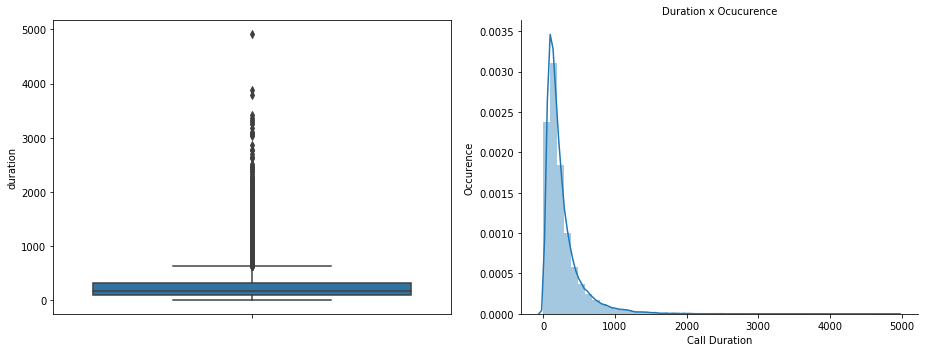

In [13]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'duration', data = bank, orient = 'v', ax = ax1)
ax1.tick_params(labelsize=10)

sns.distplot(bank['duration'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Call Duration', fontsize=10)
ax2.set_ylabel('Occurence', fontsize=10)
ax2.set_title('Duration x Ocucurence', fontsize=10)
ax2.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [14]:
print("Max duration  call in minutes:  ", round((bank['duration'].max()/60),1))
print("Min duration  call in minutes:   ", round((bank['duration'].min()/60),1))
print("Mean duration call in minutes:   ", round((bank['duration'].mean()/60),1))
print("STD dev of duration  call in minutes:   ", round((bank['duration'].std()/60),1))
# Std close to the mean means that the data values are close to the mean 

Max duration  call in minutes:   82.0
Min duration  call in minutes:    0.0
Mean duration call in minutes:    4.3
STD dev of duration  call in minutes:    4.3


In [15]:
# Quartiles
print('1º Quartile: ', bank['duration'].quantile(q = 0.25))
print('2º Quartile: ', bank['duration'].quantile(q = 0.50))
print('3º Quartile: ', bank['duration'].quantile(q = 0.75))
print('4º Quartile: ', bank['duration'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Duration calls above: ', bank['duration'].quantile(q = 0.75) + 
                      1.5*(bank['duration'].quantile(q = 0.75) - bank['duration'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  103.0
2º Quartile:  180.0
3º Quartile:  319.0
4º Quartile:  4918.0
Duration calls above:  643.0 are outliers


In [16]:
print('Numerber of outliers: ', bank[bank['duration'] > 644.5]['duration'].count())
print('Number of rows: ', len(bank))
#Outliers in %
print('Outliers are:', round(bank[bank['duration'] > 644.5]['duration'].count()*100/len(bank),2), '%')

Numerber of outliers:  3222
Number of rows:  45211
Outliers are: 7.13 %


In [17]:
# Look, if the call duration is iqual to 0, then is obviously that this person didn't subscribed, 
# THIS LINES NEED TO BE DELETED LATER 
bank[(bank['duration'] == 0)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
6424,53,management,married,primary,no,351,yes,no,unknown,27,may,0,4,-1,0,unknown,no
22937,35,technician,married,secondary,no,5535,no,no,cellular,26,aug,0,15,-1,0,unknown,no
36425,31,entrepreneur,married,secondary,no,162,yes,yes,cellular,11,may,0,2,-1,0,unknown,no


In [18]:
bank=bank[(bank['duration'] != 0)]

### 9)Plots

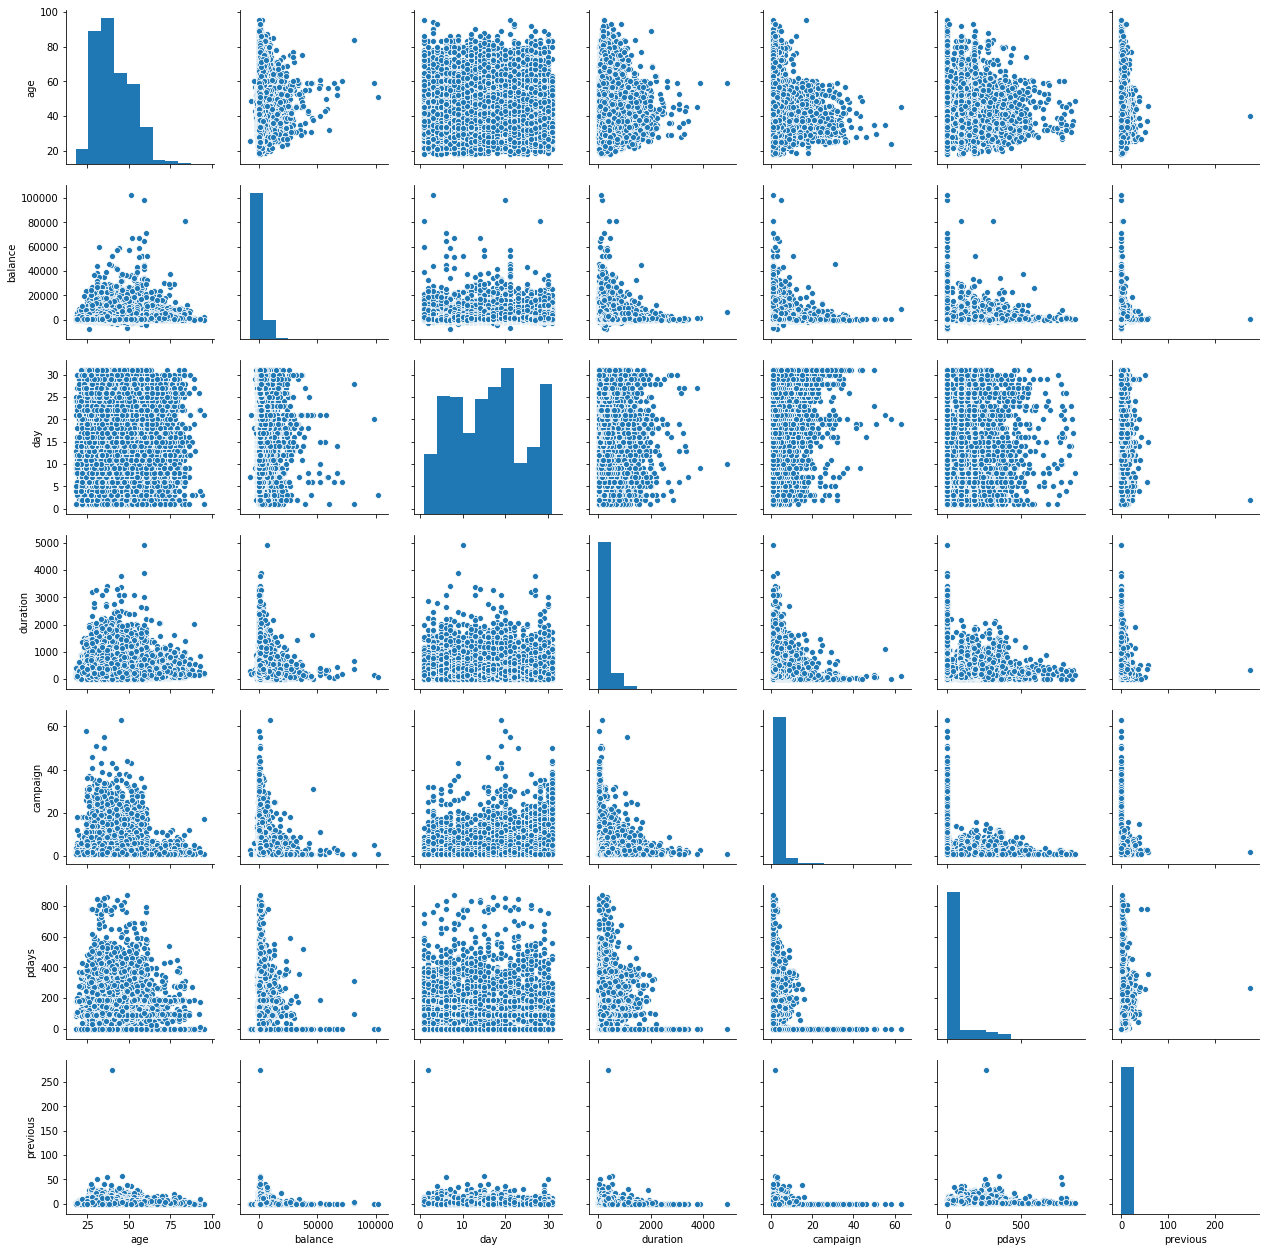

In [19]:
#histograms from the pair plots
sns.pairplot(bank)

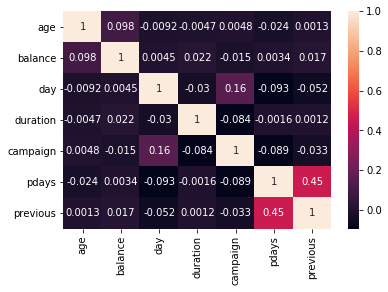

In [20]:
sns.heatmap(bank.corr(),annot=True)

**The distribution of all numerical variables other than age is highly skewed - hence we might want to transform or bin some of these variables**

**On similar lines, we will perform univariate analysis of other numerical variables**

#### Univariate analysis - countplot / value count for categorical variables


In [21]:
bank['job'].value_counts()

blue-collar      9732
management       9457
technician       7596
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1486
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

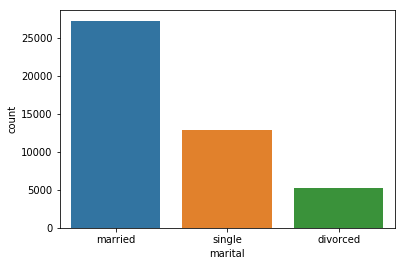

In [22]:
sns.countplot(bank['marital'])

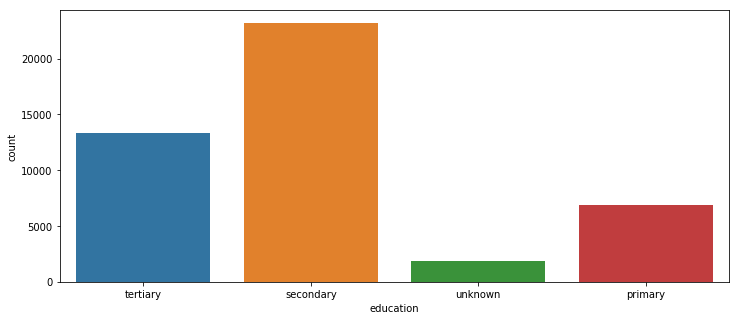

In [23]:
plt.figure(figsize=(12,5))
sns.countplot(bank['education'])

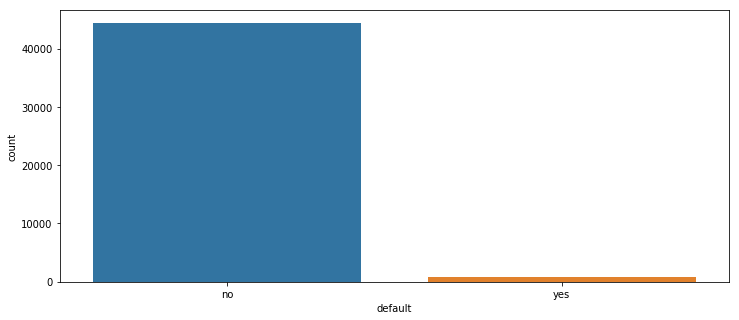

In [24]:
plt.figure(figsize=(12,5))
sns.countplot(bank['default'])

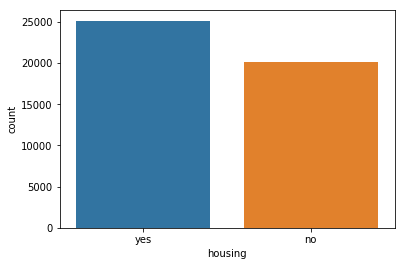

In [25]:
sns.countplot(bank['housing'])

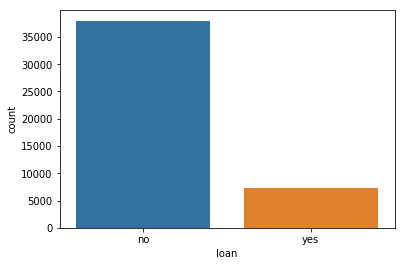

In [26]:
sns.countplot(bank['loan'])

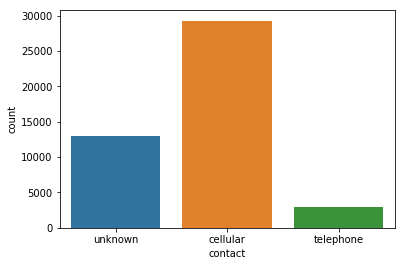

In [27]:
sns.countplot(bank['contact'])

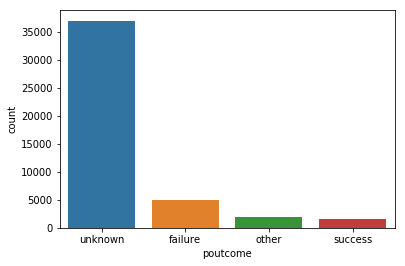

In [28]:
sns.countplot(bank['poutcome'])

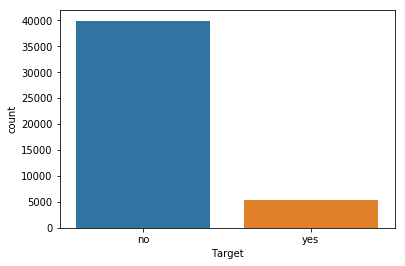

In [29]:
sns.countplot(bank['Target'])

### Bivariate analysis

In [30]:
#Group numerical variables by mean for the classes of Y variable
np.round(bank.groupby(["Target"]).mean() ,1)

,age,balance,day,duration,campaign,pdays,previous
Target,,,,,,,
no,40.8,1303.7,15.9,221.2,2.8,36.4,0.5
yes,41.7,1804.3,15.2,537.3,2.1,68.7,1.2


#### The mean balance is higher for customers who subscribe to the term deposit compared to those who dont


#### number of days that passed by after the client was last contacted from a previous campaign is higher for people who have subscribed

#### number of contacts performed before this campaign is also higher for customers who subscribe

##### All of the above facts indicate that customers with a higher balance and those who have been contacted frequently before the campaign tend to subscribe for the term deposit

### Bivariate analysis using crosstab

In [31]:
pd.crosstab(bank['job'], bank['Target'], normalize='index').sort_values(by='yes',ascending=False )

Target,no,yes
job,,
student,0.713220,0.286780
retired,0.772085,0.227915
unemployed,0.844973,0.155027
management,0.862430,0.137570
admin.,0.877973,0.122027
self-employed,0.881571,0.118429
unknown,0.881944,0.118056
technician,0.889415,0.110585
services,0.911170,0.088830


##### The highest conversion is for students (28%) and lowest is for blue-collar(7%)

In [32]:
pd.crosstab(bank['marital'], bank['Target'], normalize='index').sort_values(by='yes',ascending=False )

Target,no,yes
marital,,
single,0.850508,0.149492
divorced,0.880545,0.119455
married,0.898754,0.101246


In [33]:
pd.crosstab(bank['education'], bank['Target'], normalize='index').sort_values(by='yes',ascending=False )

Target,no,yes
education,,
tertiary,0.849936,0.150064
unknown,0.864297,0.135703
secondary,0.894397,0.105603
primary,0.913723,0.086277


In [34]:
print(pd.crosstab(bank['default'], bank['Target'], normalize='index').sort_values(by='yes',ascending=False ))
print(bank['default'].value_counts(normalize=True))

Target         no       yes
default                    
no       0.882031  0.117969
yes      0.936196  0.063804
no     0.981972
yes    0.018028
Name: default, dtype: float64


In [35]:
pd.crosstab(bank['housing'], bank['Target'], normalize='index').sort_values(by='yes',ascending=False )

Target,no,yes
housing,,
no,0.832968,0.167032
yes,0.922994,0.077006


In [36]:
pd.crosstab(bank['loan'], bank['Target'], normalize='index').sort_values(by='yes',ascending=False )

Target,no,yes
loan,,
no,0.873436,0.126564
yes,0.933177,0.066823


In [37]:
pd.crosstab(bank['contact'], bank['Target'], normalize='index').sort_values(by='yes',ascending=False )

Target,no,yes
contact,,
cellular,0.850801,0.149199
telephone,0.865795,0.134205
unknown,0.959290,0.040710


In [38]:
pd.crosstab(bank['month'], bank['Target'], normalize='index').sort_values(by='yes',ascending=False )

Target,no,yes
month,,
mar,0.480084,0.519916
dec,0.532710,0.467290
sep,0.535406,0.464594
oct,0.562331,0.437669
apr,0.803206,0.196794
feb,0.833522,0.166478
aug,0.889850,0.110150
jun,0.897772,0.102228
nov,0.898489,0.101511


### Listing out the high level findings from bivariate analysis that could provide pointers to feature selection


In [39]:
#Binning:
def binning(col, cut_points, labels=None):
  #Define min and max values:
  minval = col.min()
  maxval = col.max()

  #create list by adding min and max to cut_points
  break_points = [minval] + cut_points + [maxval]

  #if no labels provided, use default labels 0 ... (n-1)
  if not labels:
    labels = range(len(cut_points)+1)

  #Binning using cut function of pandas
  colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
  return colBin

In [40]:
#Binning campaign
cut_points = [2,3,4]
labels = ["<=2","3","4",">4"]
bank['campaign_range'] = binning(bank['campaign'], cut_points, labels)
bank['campaign_range'].value_counts()

<=2    30048
>4      6118
3       5521
4       3521
Name: campaign_range, dtype: int64

In [41]:
bank.drop(['campaign'], axis=1, inplace=True)
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'pdays', 'previous',
       'poutcome', 'Target', 'campaign_range'],
      dtype='object')

In [42]:
#function to creat group of ages, this helps because we have 78 differente values here
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(bank);

In [43]:
def duration(data):

    data.loc[data['duration'] <= 102, 'duration'] = 1
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180)  , 'duration']    = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration']   = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 644.5), 'duration'] = 4
    data.loc[data['duration']  > 644.5, 'duration'] = 5

    return data
duration(bank);

#### Split data into train/test

In [44]:
X = bank.drop("Target" , axis=1)
y = bank["Target"]   # select all rows and the 17 th column which is the classification "Yes", "No"
X = pd.get_dummies(X,drop_first=True)
y=y.replace(['yes','no'],[1,0])

In [45]:
test_size = 0.30 # taking 70:30 training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

#### Applying multiple models by fitting train data

#### Decision Tree Classifier

[[11041   898]
 [  880   744]]
87.0


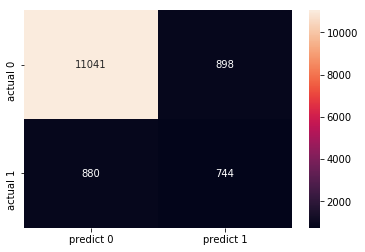

In [46]:
dtree = DecisionTreeClassifier(criterion='gini',random_state=1) #criterion = entopy, gini
dtree.fit(X_train, y_train)
dtreepred = dtree.predict(X_test)

cm=confusion_matrix(y_test, dtreepred)
print(cm)
print(round(accuracy_score(y_test, dtreepred),2)*100)
sns.heatmap(cm,annot=True,fmt='g',yticklabels=['actual 0','actual 1'],xticklabels=['predict 0','predict 1'])

In [47]:
#classification Metrics
DTREECV = (cross_val_score(dtree, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
DTREECV_Recall=recall_score(y_test, dtreepred)
DTREECV_F1=f1_score(y_test, dtreepred)
DTREECV_Pre=precision_score(y_test,dtreepred)

#### Random Forest classifier

[[11598   341]
 [ 1026   598]]
90.0


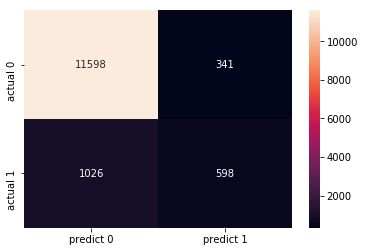

In [48]:
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)
cm=confusion_matrix(y_test, rfcpred )
print(cm)
print(round(accuracy_score(y_test, rfcpred),2)*100)
sns.heatmap(cm,annot=True,fmt='g',yticklabels=['actual 0','actual 1'],xticklabels=['predict 0','predict 1'])

In [49]:
#classification Metrics
RFCCV_Recall=recall_score(y_test, rfcpred)
RFCCV_Pre=precision_score(y_test, rfcpred)
RFCCV_F1=f1_score(y_test, rfcpred)
RFCCV = (cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

#### Ensemble Learning - Bagging

In [50]:
bgcl = BaggingClassifier(base_estimator=dtree, n_estimators=200,random_state=1)
bgcl = bgcl.fit(X_train, y_train)

0.8963356189633562
Accuracy score is  90.0
[[11468   471]
 [  935   689]]


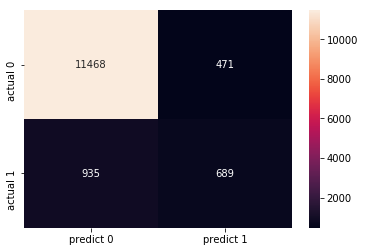

In [51]:
y_predict = bgcl.predict(X_test)
print(bgcl.score(X_test , y_test))
print("Accuracy score is ",round(accuracy_score(y_test, rfcpred),2)*100)
cm=confusion_matrix(y_test, y_predict)
print(cm)
sns.heatmap(cm,annot=True,fmt='g',yticklabels=['actual 0','actual 1'],xticklabels=['predict 0','predict 1'])

In [52]:
#classification Metrics
BAGCV= (cross_val_score(bgcl, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
BAGCV_Recall=recall_score(y_test, y_predict)
BAGCV_Pre=precision_score(y_test, y_predict)
BAGCV_F1=f1_score(y_test, y_predict)

#### Ensemble Learning - AdaBoosting

In [53]:
abcl = AdaBoostClassifier(n_estimators=200, random_state=1)
abcl = abcl.fit(X_train, y_train)

0.8995797389957974
[[11598   341]
 [ 1021   603]]


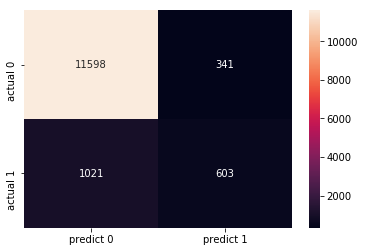

In [54]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))

cm=confusion_matrix(y_test, y_predict)
print(cm)
sns.heatmap(cm,annot=True,fmt='g',yticklabels=['actual 0','actual 1'],xticklabels=['predict 0','predict 1'])

In [55]:
#classification Metrics
ADACV= (cross_val_score(abcl, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
ADACV_Recall=recall_score(y_test, y_predict)
ADACV_Pre=precision_score(y_test, y_predict)
ADACV_F1=f1_score(y_test, y_predict)

#### Ensemble Learning - GradientBoost

[[11630   309]
 [ 1006   618]]
90.0


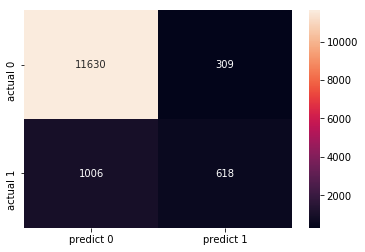

In [56]:
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
gbkpred = gbk.predict(X_test)
cm=confusion_matrix(y_test, gbkpred )
print(cm)
print(round(accuracy_score(y_test, gbkpred),2)*100)
sns.heatmap(cm,annot=True,fmt='g',yticklabels=['actual 0','actual 1'],xticklabels=['predict 0','predict 1'])

In [57]:
#classification Metrics
GBKCV = (cross_val_score(gbk, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
GBKCV_Recall=recall_score(y_test, gbkpred)
GBKCV_Pre=precision_score(y_test, gbkpred)
GBKCV_F1=f1_score(y_test, gbkpred)

#### Lets Compare performances of all the models using multiple evaluation metrics for classification

In [58]:
#Cross value scores
models = pd.DataFrame({
                'Models': ['Random Forest Classifier', 'Decision Tree Classifier','Bagging','Ada Boosting','Gradient Boosting'],
                'Score':  [RFCCV, DTREECV,BAGCV,ADACV ,GBKCV]})

models.sort_values(by='Score', ascending=False)

,Models,Score
4,Gradient Boosting,0.904440
0,Random Forest Classifier,0.903334
2,Bagging,0.902102
3,Ada Boosting,0.901343
1,Decision Tree Classifier,0.873440


In [59]:
#Precision value scores
models = pd.DataFrame({
                'Models': ['Random Forest Classifier', 'Decision Tree Classifier','Bagging','Ada Boosting','Gradient Boosting'],
                'Score':  [RFCCV_Pre, DTREECV_Pre,BAGCV_Pre,ADACV_Pre ,GBKCV_Pre]})

models.sort_values(by='Score', ascending=False)

,Models,Score
4,Gradient Boosting,0.666667
3,Ada Boosting,0.638771
0,Random Forest Classifier,0.636848
2,Bagging,0.593966
1,Decision Tree Classifier,0.453106


In [60]:
#F1 Scores
models = pd.DataFrame({
                'Models': ['Random Forest Classifier', 'Decision Tree Classifier','Bagging','Ada Boosting','Gradient Boosting'],
                'Score':  [RFCCV_F1, DTREECV_F1,BAGCV_F1,ADACV_F1 ,GBKCV_F1]})

models.sort_values(by='Score', ascending=False)

,Models,Score
2,Bagging,0.494971
4,Gradient Boosting,0.484516
3,Ada Boosting,0.469626
0,Random Forest Classifier,0.466641
1,Decision Tree Classifier,0.455603


In [61]:
#Recall scores
models = pd.DataFrame({
                'Models': ['Random Forest Classifier', 'Decision Tree Classifier','Bagging','Ada Boosting','Gradient Boosting'],
                'Score':  [RFCCV_Recall, DTREECV_Recall,BAGCV_Recall,ADACV_Recall ,GBKCV_Recall]})

models.sort_values(by='Score', ascending=False)

,Models,Score
1,Decision Tree Classifier,0.458128
2,Bagging,0.424261
4,Gradient Boosting,0.380542
3,Ada Boosting,0.371305
0,Random Forest Classifier,0.368227


***Here we have a class imbalance and there are major 'no' cases, so recall will be a good measure of performance and also our aim is to predict if the client will subscribe (yes/no) a term deposit and so our goal is to capture as many as subscribers even if we are not very sure.***

### Hence as per the recall scores Bagging and Decision Tree Classifier performs best in this case and the order follows as above.